In [16]:
import fastf1
import pandas as pd
import os

# 1️⃣ Enable cache
cache_path = "C:/Users/dell/Documents/MECH 534 ML/Project/cache"
os.makedirs(cache_path, exist_ok=True)
fastf1.Cache.enable_cache(cache_path)

# Load any session (you can change the year and event)
session = fastf1.get_session(2023, 'Bahrain', 'R')
session.load()

# Get lap data
laps = session.laps.copy()
laps['LapTime_sec'] = laps['LapTime'].dt.total_seconds()
# Try to get weather data (some sessions don't have all columns)
weather = session.weather_data.copy()

# See what columns are available
print("Available weather columns:", weather.columns.tolist())

# Keep only the ones that exist
cols_to_keep = [col for col in ['AirTemp', 'TrackTemp'] if col in weather.columns]

if len(cols_to_keep) > 0:
    # Merge if at least one temperature column is present
    laps = pd.merge_asof(
        laps.sort_values('Time'),
        weather[['Time'] + cols_to_keep].sort_values('Time'),
        on='Time',
        direction='nearest'
    )
else:
    print("⚠️ Warning: AirTemp and TrackTemp not available for this session.")
    # Add placeholder columns so your code still runs
    laps['AirTemp'] = None
    laps['TrackTemp'] = None

# Now select final columns
lap_data = laps[['Driver', 'Team', 'LapNumber', 'Stint', 'Compound', 'TyreLife',
                 'LapTime_sec', 'TrackStatus', 'AirTemp', 'TrackTemp', 'IsPersonalBest']].copy()

print(lap_data.head())

# Output to csv

output_csv = "C:/Users/dell/Documents/MECH 534 ML/Project/bahrain_2023_lapsWithTemp.csv"
lap_data.to_csv(output_csv, index=False)
print(f"\n✅ Lap data saved to: {output_csv}")

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


Available weather columns: ['Time', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall', 'TrackTemp', 'WindDirection', 'WindSpeed']
  Driver             Team  LapNumber  Stint Compound  TyreLife  LapTime_sec  \
0    VER  Red Bull Racing        1.0    1.0     SOFT       4.0       99.019   
1    LEC          Ferrari        1.0    1.0     SOFT       1.0      100.230   
2    PER  Red Bull Racing        1.0    1.0     SOFT       4.0      101.063   
3    SAI          Ferrari        1.0    1.0     SOFT       4.0      101.659   
4    HAM         Mercedes        1.0    1.0     SOFT       4.0      102.288   

  TrackStatus  AirTemp  TrackTemp IsPersonalBest  
0          12     27.3       31.1          False  
1          12     27.3       31.1          False  
2          12     27.3       31.1          False  
3          12     27.3       31.1          False  
4          12     27.3       31.1          False  

✅ Lap data saved to: C:/Users/dell/Documents/MECH 534 ML/Project/bahrain_2023_lapsWithTemp.c

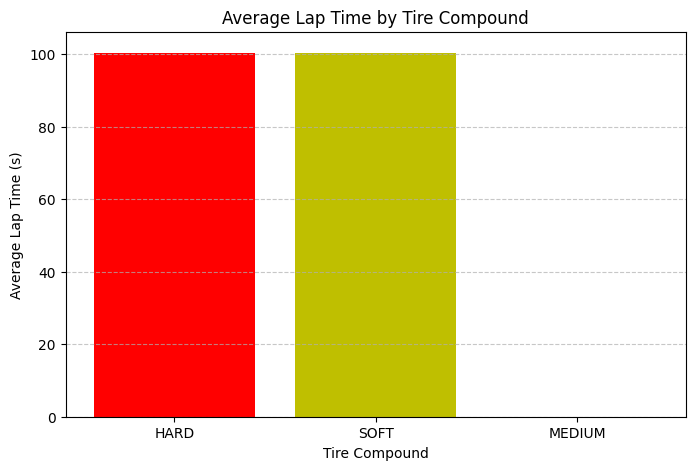

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("bahrain_2023_lapsWithTemp.csv")

# Drop rows with missing lap times or compounds
df = df.dropna(subset=["LapTime_sec", "Compound"])

# Compute average lap time per tire compound
avg_laptime = df.groupby("Compound")["LapTime_sec"].mean().sort_values()

# Plot
plt.figure(figsize=(8,5))
plt.bar(avg_laptime.index, avg_laptime.values, color=['r','y','w','g'])
plt.title("Average Lap Time by Tire Compound")
plt.xlabel("Tire Compound")
plt.ylabel("Average Lap Time (s)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

